## Cálculo de volume molar a partir da equação de Van der Walls

In [287]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [288]:
def get_P(v: float or int) -> float or int:
    P = ((R*Tn)/(v-b)) - (a/(v**2))
    return P

### Cálculo dos Parâmetros

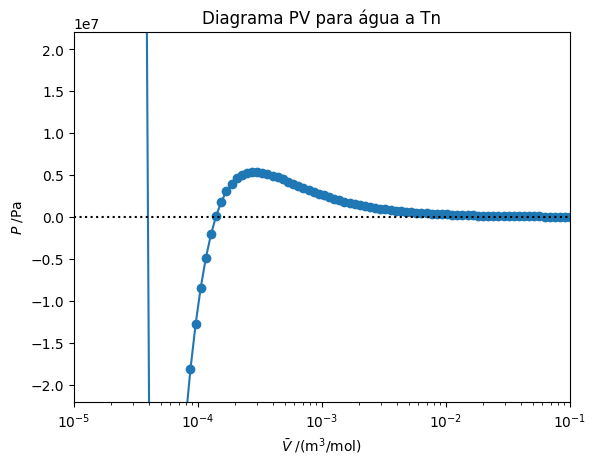

In [289]:
Tc: float or int = 647.1 #K
Pc: float or int = 220.55*(10**5) #Pa
Tn: float or int = 373.15 #K
R: float = 8.314 #J/mol*K

a: float or int = (27/64) * ((R**2)*(Tc**2)/Pc)
b: float or int = (1/8) * (R*Tc/Pc)
P: list = []
v: list = []
v.append(b*1.001)

for i in range(99):
    v.append(v[i]*1.1)

for i, volume in enumerate(v):
    P.append(get_P(volume))

plt.scatter(v,P)
plt.plot(v,P)
plt.xscale('log')
plt.ylim(-1*Pc,1*Pc)
plt.xlim(1e-5,.1)
plt.axhline(0,ls=':',c='k')#show
plt.title('Diagrama PV para água a Tn')
plt.xlabel(r'$\bar V$ /(m$^3$/mol)')
plt.ylabel(r'$P$ /Pa')
plt.show()



### Equações Iteraveis

0.0304693409563771
3.902039116706032e-05


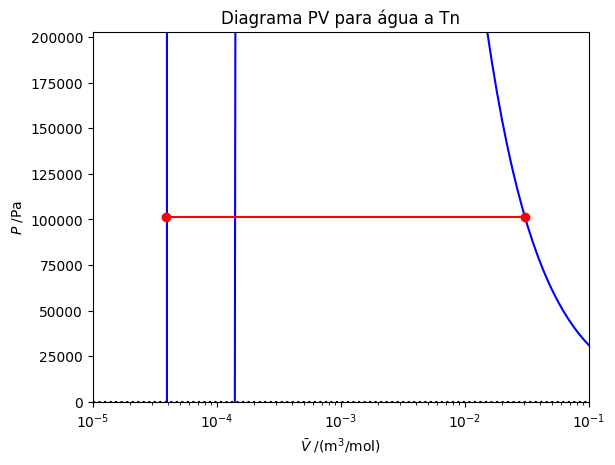

In [290]:
Patm =101325 #Pa
Patm2 = [Patm,Patm]
Patm3 = [Patm,Patm,Patm]

# Vapor
vv = []
vv.append(R*Tn/Patm)

for i in range(10):
    v_novo = (R*Tn/Patm) - ((a*(vv[i]-b))/(Patm*(vv[i]**2))) + b
    vv.append(v_novo)

volume_vapor = vv[len(vv)-1]
print(volume_vapor)

# Líquido
vl = []
vl.append(1.05*b)

for i in range(10):
    v_novo = b + (((vl[i]**2)/a)*(R*Tn - (Patm*(vl[i] - b))))
    vl.append(v_novo)

volume_liquido = vl[len(vl)-1]
print(volume_liquido)

volumes_b = [volume_liquido,volume_vapor]

plt.plot(v,P,'-b',volumes_b,Patm2,'ro',volumes_b,Patm2,'r-')
plt.xscale('log')
plt.ylim(0,Patm*2)
plt.xlim(1e-5,.1)
plt.axhline(0,ls=':',c='k')#show
plt.title('Diagrama PV para água a Tn')
plt.xlabel(r'$\bar V$ /(m$^3$/mol)')
plt.ylabel(r'$P$ /Pa')
plt.show()

### Resolvendo Cúbica

[3.04693410e-02 1.40131493e-04 3.90219093e-05]


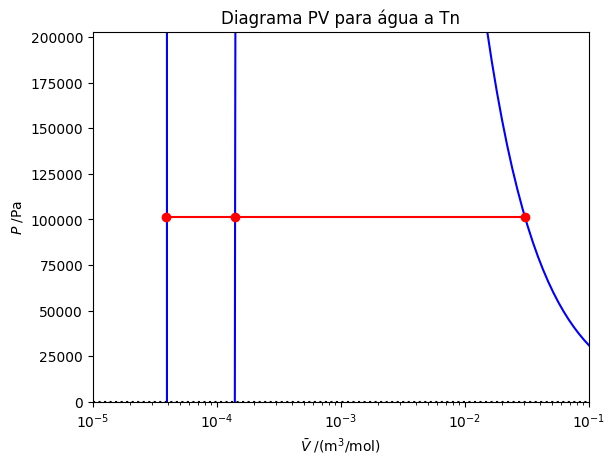

In [291]:
c3 = Patm
c2 = - Patm*b - R*Tn
c1 = a
c0 = -a*b

volumes = np.roots([c3,c2,c1,c0])
print(volumes)

plt.plot(v,P,'-b',volumes,Patm3,'ro',volumes,Patm3,'r-')
plt.xscale('log')
plt.ylim(0,Patm*2)
plt.xlim(1e-5,.1)
plt.axhline(0,ls=':',c='k')#show
plt.title('Diagrama PV para água a Tn')
plt.xlabel(r'$\bar V$ /(m$^3$/mol)')
plt.ylabel(r'$P$ /Pa')
plt.show()